In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import pandas as pd
df_eng = pd.read_csv('/content/drive/My Drive/edited_topics_set2.csv')
df_beng = pd.read_csv('/content/drive/My Drive/edited_tag_bengali.csv')

In [7]:
df_beng.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
_id               0
heading           0
publish_date      0
imagelink         1
tags              0
content           0
processed_tags    0
dtype: int64

In [8]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

# vectorizing processed content

text_eng = df_eng['processed_content'].values
X_eng = vectorize(text_eng, 2 ** 12)
X_eng.shape


(2155, 4096)

In [9]:

text_beng = df_beng['processed_tags'].values
X_beng = vectorize(text_beng, 2**12)
X_beng.shape

(316, 643)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X_eng.toarray())
X_reduced.shape

(2155, 1224)

Clustering task 

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

# run kmeans with many different k
distortions = []
K = range(28, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X_eng.shape[0])
    print('Found distortion for {} clusters'.format(k))

Found distortion for 28 clusters
Found distortion for 29 clusters


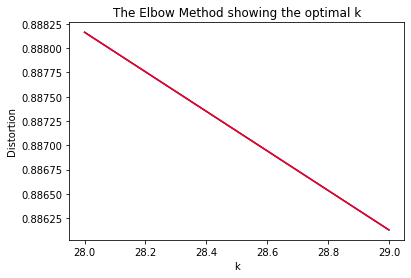

In [13]:
import matplotlib.pyplot as plt

X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [15]:
k = 30 #taking 30 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df_eng['cluster'] = y_pred ##storing the corresponding clusters of each row

In [ ]:
# save the model in pickle file
import pickle


In [16]:
df_eng['cluster'].value_counts()

5     376
13    226
22    105
14     98
1      96
19     95
3      95
23     93
11     85
6      83
2      78
28     73
21     70
7      67
24     64
17     58
25     57
26     48
4      39
12     34
10     33
16     30
9      29
18     27
27     25
0      22
15     18
8      11
20     11
29      9
Name: cluster, dtype: int64

Multi-label Classification task

In [21]:
#Create Dependent and Independent Datasets based on our Dependent #and Independent features
X  = X_reduced
y= df_eng['cluster']
#Split the Data into Training and Testing sets with test size as #30%
X_train, y_train = X, y

X_test = X_beng
# we dont have y_test. We need to predict using classifier model

Using Random Forest Classifier

In [22]:
# import pickle
# import numpy as np
# from sklearn.ensemble import RandomForestClassifier
# from pprint import pprint
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import ShuffleSplit
# import matplotlib.pyplot as plt
# import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
# #Cross-Validation for Hyperparameter tuning
# #First, we can see what hyperparameters the model has:

# rf_0 = RandomForestClassifier(random_state = 8)

# print('Parameters currently in use:\n')
# pprint(rf_0.get_params())

We'll tune the following ones:

n_estimators = number of trees in the forest.

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [30]:
# #Randomized Search Cross Validation
# #We first need to define the grid:

# # n_estimators
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# # max_features
# max_features = ['auto', 'sqrt']

# # max_depth
# max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
# max_depth.append(None)

# # min_samples_split
# min_samples_split = [2, 5, 10]

# # min_samples_leaf
# min_samples_leaf = [1, 2, 4]

# # bootstrap
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# pprint(random_grid)

In [27]:
# #Then, we'll perform the Random Search:

# # First create the base model to tune
# rfc = RandomForestClassifier(random_state=8)

# # Definition of the random search
# random_search = RandomizedSearchCV(estimator=rfc,
#                                    param_distributions=random_grid,
#                                    n_iter=2,
#                                    scoring='accuracy',
#                                    cv=3, 
#                                    verbose=1, 
#                                    random_state=8)

# # Fit the random search model
# random_search.fit(X_train, y_train)

Random forest is commented because currently we arent using it as it takes too much time

SVC

In [28]:
import pickle
import numpy as np
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


We'll tune the following ones:

C: Penalty parameter C of the error term.

kernel: Specifies the kernel type to be used in the algorithm.

gamma: Kernel coefficient.

degree: Degree of the polynomial kernel function.

In [32]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


In [ ]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=5,
                                   scoring='accuracy',
                                   cv=2, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Again takes too much time